In [12]:
import numpy as np
import theano
import theano.tensor as T
from theano import pp
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x =  T.scalar('x')
y = x ** 2
gy = T.grad(y, x)
pp(gy)
f = theano.function([x], gy)
f(4), np.allclose(f(94.2), 188.4)

(array(8.0), True)

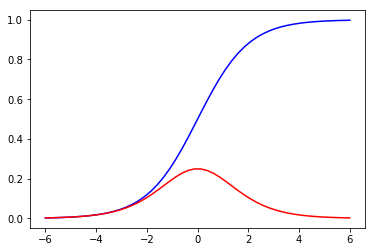

In [33]:
# Logistic Function Differentiation
x = T.dmatrix('x')
s = 1 / (1 + T.exp(-x)) # note in the original, the T.sum() function is here
gs = T.grad(T.sum(s), x)
logistic = theano.function([x], s)
dlogistic = theano.function([x], gs)
x_in = np.linspace(-6, 6)
plt.plot(x_in, logistic([x_in]).flatten(), c="blue")
plt.plot(x_in, dlogistic([x_in]).flatten(), c="red")

In [50]:
# Computing the Jacobian of a matrix

x = T.dvector('x')
y = x ** 2
J, updates = theano.scan(lambda i, y, x: T.grad(y[i], x), sequences=T.arange(y.shape[0]), non_sequences=[y, x])
f = theano.function([x], J, updates=updates)
# theano.gradient.jacobian(y, x) <- figure that one out
f([4,16])

(array([[  8.,   0.],
        [  0.,  32.]]), Reshape{1}.0)

In [53]:
# Computing the Hessian
# this could be done with theano.gradient.hessian

x = T.dvector('x')
y = x ** 2
cost = y.sum()
gy = T.grad(cost, x)
H, updates = theano.scan(lambda i, gy, x: T.grad(gy[i], x), sequences=T.arange(gy.shape[0]), non_sequences=[gy,x])
f = theano.function([x], H, updates=updates)
f([4, 8])


array([[ 2.,  0.],
       [ 0.,  2.]])

In [87]:
# Compute Normal score function
x = 0
mu = T.dvector('mu')
sigma = T.dvector('sigma')
pdf = (2*np.pi*sigma**2)**-0.5*T.exp(-(2*sigma**2)**-1 * (x - mu)**2)
score = T.grad(T.log(pdf).sum(), [mu, sigma])
f = theano.function([mu, sigma], score)
f([1], [np.sqrt(9)])

([array([-0.11111111]), array([-0.2962963])],
 'log((((TensorConstant{6.283185307179586} * (sigma ** TensorConstant{2})) ** TensorConstant{-0.5}) * exp(((-((TensorConstant{2} * (sigma ** TensorConstant{2})) ** TensorConstant{-1})) * ((TensorConstant{0} - mu) ** TensorConstant{2})))))')

In [93]:
# R operator and L Operator
# This is the Jacobian times a vector or matrix.  R and L stand for what 
# side the vector is multiplied from i.e. [df(a)/dx].dot(V) or V.dot([df(a)/dx])

W, V = T.dmatrices("W", "V")
x, v = T.vectors("x", "v")
y = T.dot(x, W)
JV = T.Rop(y, W, V)
VJ = T.Lop(y, W, v)

f_R = theano.function([W,V,x], JV)
f_L = theano.function([v,x], VJ)
f_R([[1, 1], [1, 1]], [[2, 2], [2, 2]], [0,1]), f_L([2,2],[0, 1])

(array([ 2.,  2.]), array([[ 0.,  0.],
        [ 2.,  2.]]))